# Importación de librerías

In [39]:
# NumPy para manejo de vectores
import numpy as np

# Matplotlib para visualizar embeddings
import matplotlib.pyplot as plt

# Gensim (modelos de word embeddings)
import gensim
import gensim.downloader as gensim_api
from gensim.models.fasttext import load_facebook_model
from gensim.models import Word2Vec

# NLTK
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.corpus import gutenberg

# SpaCy
import spacy

# Sci-kit learn
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

english_sw = set(nltk.corpus.stopwords.words("english"))

In [4]:
for model_name in gensim_api.info()["models"].keys():
    print(model_name)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


# Ejercicio 1
- Los modelos basados en embeddings estáticos proporcionan una representación
vectorial de palabras en un espacio continuo de dimensiones fijas, donde cada palabra
tiene un único vector asociado independientemente del contexto en el que aparezca.
Estos modelos son capaces de capturar la semántica de las palabras a partir de su
entrenamiento no supervisado sobre grandes corpus de texto.  

    Word2Vec es uno de los modelos que aprende estas representaciones vectoriales
    mediante el entrenamiento sobre ventanas de contexto. En concreto, emplea la técnica
    Skip-gram, que predice palabras de contexto a partir de una palabra objetivo, o CBOW,
    que predice la palabra objetivo a partir de su contexto.  

    Por otro lado, GloVe es otro de los modelos para la generación de embeddings estáticos,
    basándose para ello en el análisis de coocurrencias de palabras. Específicamente, GloVe
    basa su entrenamiento en la construcción de una matriz de coocurrencia de palabras,
    factorizándola para la obtención de representaciones vectoriales.  

    Asimismo, otro modelo relevante para la generación de estos embeddings es FastText.
    A diferencia de Word2Vec y Glove, FastText no trabaja con palabras individuales, sino
    que lo hace a nivel de subpalabra o n-gramas de carácteres. Esta representación permite
    una mayor robustez ante palabras infrecuentes o con errores tipográficos, solucionando
    el famoso problema de palabras fuera del vocabulario (OOV por sus siglas en inglés).  

    En este ejercicio, se desea explorar el uso de los modelos de embeddings estáticos de
    palabras Word2Vec, GloVe y FastText para el análisis de relaciones semánticas. Una
    propiedad interesante de estos modelos es su capacidad para capturar relaciones
    semánticamente analógicas, como las presentes en la famosa ecuación:  
    $$
    \text{king} - \text{man} + \text{woman} = \text{queen}
    $$

---
## Cargar modelos

In [5]:
# Cargamos los modelos preentrenados "word2vecgoogle-news-300" y
# "glove-wiki-gigaword-300" de gensim
word2vec_google = gensim_api.load("word2vec-google-news-300")
glove_wiki = gensim_api.load("glove-wiki-gigaword-300")

# Cargamos el modelo FastText wiki.simple
ft = load_facebook_model("models/wiki.simple.bin").wv

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 376.1/376.1MB downloaded


---
## Obtener palabra que mejor completa la ecuación
$$
\text{king} - \text{man} + \text{woman} = \text{queen}
$$

In [6]:
positive = ["king", "woman"]
negative = ["man"]
most_similar_word2vec = word2vec_google.most_similar(positive=positive, negative=negative, topn=1)
most_similar_glove = glove_wiki.most_similar(positive=positive, negative=negative, topn=1)
most_similar_ft = ft.most_similar(positive=positive, negative=negative, topn=1)
print("- Palabra que mejor completa la ecuación:")
print(f"    - Utilizando Word2Vec: {most_similar_word2vec}")
print(f"    - Utilizando GloVe: {most_similar_glove}")
print(f"    - Utilizando FastText: {most_similar_ft}")

- Palabra que mejor completa la ecuación:
    - Utilizando Word2Vec: [('queen', 0.7118193507194519)]
    - Utilizando GloVe: [('queen', 0.6713277101516724)]
    - Utilizando FastText: [('queen', 0.5129120349884033)]


---
# Ejercicio 2
- Tanto Word2Vec como GloVe y FastText proporcionan embedding estáticos a nivel de palabra. Dada una lista de palabras, podemos obtener una matriz de embeddings, donde las filas son las palabras que componen la lista y las columnas son el número de dimensiones que tienen los embeddings.  

    - Con Word2Vec, GloVe y FastText, obtén la matriz de embeddings del conjunto de palabras ["apple", "orange", "banana"]. ¿Qué dimensiones tienen? ¿Qué características tienen dichas matrices (dispersa vs densa, números enteros vs flotantes, …)?
    - Con Word2Vec, GloVe y FastText, intenta obtener el embedding de la palabra "orangge". ¿Qué modelos permiten obtenerlo? ¿Cuáles no? ¿A qué se debe?

In [7]:
words = ["apple", "orange", "banana"]
# Función para obtener matriz de embeddings
def get_embeddings_matrix(model, words: list[str]):
    return np.array([model[w] for w in words if w in words])

embeddings_matrix_word2vec = get_embeddings_matrix(word2vec_google, words)
embeddings_matrix_glove = get_embeddings_matrix(glove_wiki, words)
embeddings_matrix_ft = get_embeddings_matrix(ft, words)
print("- Matrices de embeddings:")
print("    - Utilizando Word2Vec:")
print(f"        Shape: {embeddings_matrix_word2vec.shape}")
print("    - Utilizando GloVe:")
print(f"        Shape: {embeddings_matrix_glove.shape}")
print("    - Utilizando FastText:")
print(f"        Shape: {embeddings_matrix_ft.shape}")

- Matrices de embeddings:
    - Utilizando Word2Vec:
        Shape: (3, 300)
    - Utilizando GloVe:
        Shape: (3, 300)
    - Utilizando FastText:
        Shape: (3, 300)


In [8]:
# Función para obtener el embedding de una palabra
def get_embedding(model, word: str):
    if word in model:
        return model[word]
    else:
        return None

word = "orangge"
word_embedding_word2vec = get_embedding(word2vec_google, word)
word_embedding_glove = get_embedding(glove_wiki, word)
word_embedding_ft = get_embedding(ft, word)

print(f"- Embedding de la palabra {word}:")
print("    - Utilizando Word2Vec:")
print(f"        {word_embedding_word2vec}")
print("    - Utilizando GloVe:")
print(f"        {word_embedding_glove}")
print("    - Utilizando FastText:")
print(f"        {word_embedding_ft}")

- Embedding de la palabra orangge:
    - Utilizando Word2Vec:
        None
    - Utilizando GloVe:
        None
    - Utilizando FastText:
        [ 0.0848861  -0.24361728 -0.15665574 -0.27772892  0.12597975  0.34166035
 -0.53036046  0.07849488  0.06062262  0.03702094  0.16619357  0.10360388
  0.2446159   0.10989391 -0.01875357 -0.02365377  0.06570328  0.07611778
 -0.07399978  0.21350299  0.4389209   0.31556138  0.13780461 -0.29011443
 -0.05177888 -0.3906618   0.37533027 -0.35044304 -0.20348176  0.07665174
 -0.06626198  0.34911892 -0.18718702  0.02643492  0.1676504  -0.1799791
 -0.299075   -0.02373791  0.02268481  0.258172    0.34293818 -0.13190585
  0.33591038 -0.15249175  0.34161243 -0.14774841  0.05844269  0.35795975
  0.33847216 -0.05780444 -0.05892941  0.35299194 -0.25106996 -0.17131838
 -0.34667447 -0.06260791  0.62043476  0.09112868 -0.20632559 -0.25576127
 -0.11012209  0.43092152  0.3778122   0.06350358 -0.21306604  0.3386955
 -0.20319079  0.04267971 -0.08564284  0.2043439  -0.

---
# Ejercicio 3
- A través del algoritmo de reducción de dimensionalidad PCA se puede visualizar gráficamente el espacio de embeddings representado por estos modelos. A continuación, se muestra un código de ejemplo que permite visualizar un conjunto de palabras words dados sus correspondientes embeddings.

In [9]:
words = ["woman", "king", "man", "queen", "potato", "carrot", "tomato"]

# Obtener los embeddings de cada palabra
embeddings_word2vec = [get_embedding(word2vec_google, w) for w in words]
embeddings_glove = [get_embedding(glove_wiki, w) for w in words]
embeddings_ft = [get_embedding(ft, w) for w in words]

In [10]:
# Función para visualizar los embeddings con Matplotlib
def visualize_embeddings(words: list[str], word_vectors_2D: np.ndarray):
    plt.figure(figsize=(8, 6))
    for word, coord in zip(words, word_vectors_2D):
        plt.scatter(coord[0], coord[1], marker='o', label=word)
        plt.text(coord[0], coord[1], word, fontsize=12)
    plt.grid()
    plt.show()

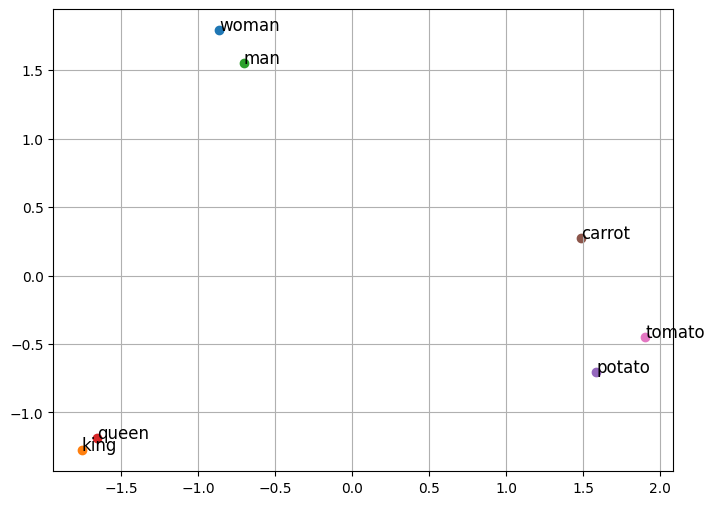

In [11]:
# Utilizando Word2Vec
pca = PCA(n_components=2)
word_vectors_2D_word2vec = pca.fit_transform(embeddings_word2vec)
visualize_embeddings(words, word_vectors_2D_word2vec)

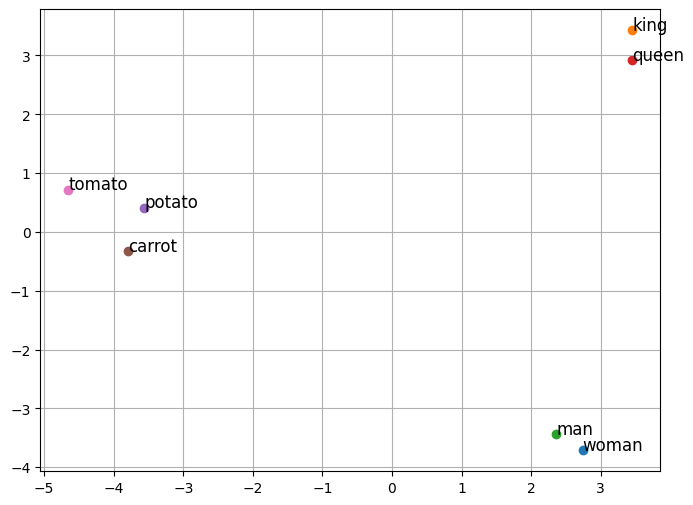

In [12]:
# Utilizando GloVe
pca = PCA(n_components=2)
word_vectors_2D_glove = pca.fit_transform(embeddings_glove)
visualize_embeddings(words, word_vectors_2D_glove)

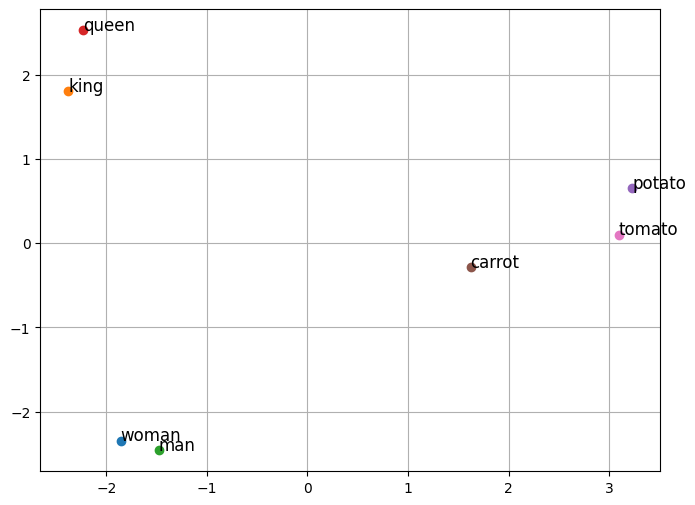

In [13]:
# Utilizando FastText
pca = PCA(n_components=2)
word_vectors_2D_ft = pca.fit_transform(embeddings_ft)
visualize_embeddings(words, word_vectors_2D_ft)

---
# Ejercicio 4
- Aunque Word2Vec, GloVe y FastText proporcionan embeddings estáticos a nivel de palabra, existen diferentes técnicas para obtener embeddings a nivel de frase. Una de las formas más populares consiste en calcular la media de embeddings de los diferentes tokens que componen una frase. Otra estrategia también frecuente consiste en quedarse con el máximo de cada dimensión, resaltando las características más sobresalientes de cada token analizado. Dada la frase de consulta "Dogs are domestic animals." y el conjunto de frases ["Dogs are pets.", "This is a dog.", "They are free today."]
    - Tokeniza las anteriores frases y elimina stopwords y puntuación.
    - Con Word2Vec, GloVe y FastText, obtén el vector promedio y el vector máximo de la frase de consulta y el conjunto de frases.
    - Con Word2Vec, GloVe y FastText, obtén el vector de media ponderada por IDF. Para ello, construye un diccionario de (palabras, su valor de idf).
    - Calcula la similitud coseno entre la frase de consulta y cada frase del conjunto de frases usando los anteriores vectores. Reflexiona sobre qué frases son consideradas más similares por estos modelos y qué vectores funcionan mejor (media, máximo, o media ponderada por IDF).

In [ ]:
req_sent = "Dogs are domestic animals."
sent_set = [
    "Dogs are pets.",
    "This is a dog.",
    "They are free today."
]

# Tokenizamos
tok_req = [w for w in regexp_tokenize(req_sent, r"") if w not in english_sw]

## Pre-procesamiento del texto
- Tokenizamos la frase de consulta y el conjunto de sentencias.
- Eliminamos la puntuación y las *stopwords*.
- Obtenemos las representaciones vectoriales de las palabras de cada sentencia (tanto la sentencia de consulta como las del conjunto) utilizando **Word2Vec**, **GloVe** y **FastText**.

---
# Ejercicio 5
- Se plantea un ejercicio para entrenar un modelo de embeddings desde cero. En este caso, se van a seleccionar los tres libros de Jane Austen que están disponibles en el proyecto Gutenberg en NLTK.

- Los pasos a seguir son los siguientes:
    - Coger el texto de los tres libros.
    - Hacer un pre-procesamiento de los textos utilizando SpaCy.
        - Convertir tokens a minúsculas.
        - Eliminar tokens que no sean palabras.
    - Cargar el modelo de Word2Vec.
    - Entrenar el modelo.

In [ ]:
# Mostrar los nombres de archivos
austen = [fileid for fileid in gutenberg.fileids() if fileid.startswith("austen")]
print("- Libros de Jane Austen en el corpus Gutenberg:")
for fileid in austen:
    print(f"    - {fileid}")

- Libros de Jane Austen en el corpus Gutenberg:
    - austen-emma.txt
    - austen-persuasion.txt
    - austen-sense.txt


In [51]:
def preprocess_text(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    return [token.lower_ for token in doc if token.is_alpha and not token.is_stop]

In [52]:
texts = []
for fileid in austen:
    text = gutenberg.raw(fileid)
    texts.append(preprocess_text(text))

In [ ]:
w2v_model = Word2Vec(texts, 
                     vector_size=300,
                     window=8, 
                     min_count=2, 
                     workers=4, 
                     sg=True, 
                     epochs=30,
                     alpha=0.025,
                     min_alpha=0.0001)
w2v_model.save("models/austen_w2v.model")

In [ ]:
w2v = Word2Vec.load("models/austen_w2v.model")

## Estadísticas del modelo

In [58]:
print("- Estadísticas del modelo:")
# Dimensión de los vectores
print(f"    - Dimensión de los vectores: {w2v.vector_size}")
# Número de palabras
print(f"    - Número de palabras: {len(w2v.wv.key_to_index)}")

- Estadísticas del modelo:
    - Dimensión de los vectores: 300
    - Número de palabras: 6348


## Palabras más similares a...

In [59]:
# Obtener palabras más similares a "love"
print(f"- Palabras más similares a love: {w2v.wv.most_similar(positive=["love"], topn=5)}")

- Palabras más similares a love: [('interests', 0.6533579230308533), ('fairest', 0.6312799453735352), ('falling', 0.6285403966903687), ('serve', 0.6281501054763794), ('helpmate', 0.6281293034553528)]


In [60]:
# Obtener palabras más similares a "hate"
print(f"- Palabras más similares a hate: {w2v.wv.most_similar(positive=["hate"], topn=5)}")

- Palabras más similares a hate: [('professing', 0.8311784267425537), ('women', 0.828571081161499), ('accommodations', 0.8268688321113586), ('foreign', 0.8130362629890442), ('board', 0.8108067512512207)]


## Similitud entre palabras

In [67]:
# Similitud entre "love" y "art"
print(f"Similitud (coseno) entre love y art: {w2v.wv.similarity("love", "art")}")

Similitud (coseno) entre love y art: 0.32760879397392273


## Vector de una palabra que no está en el vocabulario

In [71]:
v = w2v.wv["pianista"]
print(v)

KeyError: "Key 'pianista' not present"

Podemos observar que obtenemos un error al intentar obtener una palabra que no está en el vocabulario.

## Analogías

In [72]:
print("love - hate + heart = ", w2v.wv.most_similar(positive=["love", "heart"], negative=["hate"], topn=2))

love - hate + heart =  [('gain', 0.44957250356674194), ('unjust', 0.44118931889533997)]
